In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections as clt

In [2]:
def tax_calc(n):
    if n <= 11000:
        res = n*.9
    elif n <= 44725:
        res = n - (1100 + (n-11000)*.12)
    elif n <= 95375:
        res = n - (5147 + (n-44725)*.22)
    elif n <= 182100:
        res = n - (16290 + (n-95375)*.24)
    elif n <= 231250:
        res = n - (37104 + (n-182100)*.32)
    elif n <= 578125:
        res = n - (52832 + (n-231250)*.35)
    else:
        res = n - (174238.25 + (n-578,125)*.37)
    return res

In [29]:
class Graph():
    '''
    USER GUIDE
    session = Graph()
    session.toggle_<vars>
        vars = [class attributes, all_on, all_off]
    session.graph(start_time, stop_time, True/False for pre/post tax)
    '''
    # INPUTS
    da_raw_income = [61759, 67679, 87589, 114731]
    ds_raw_income = [93089, 103649, 129332, 145285]
    dod_raw_income = [75000, 80000]
    dod_stipend = 25000
    masters_cost = 74915
    invest_rate = 0.08 #return on invested amt
    invest_percent = 0.15 #percent of income going to investing

    # DATA SETUP
    Income = clt.namedtuple("Income", "pre post")

    entry_da = Income(da_raw_income[0], tax_calc(da_raw_income[0]))
    associate_da = Income(da_raw_income[1], tax_calc(da_raw_income[1]))
    senior_da = Income(da_raw_income[2], tax_calc(da_raw_income[2]))
    lead_da = Income(da_raw_income[3], tax_calc(da_raw_income[3]))
    da_incomes = [entry_da, associate_da, senior_da, lead_da] # YoE 1-2, 3-4, 5-7, 8+

    entry_ds = Income(ds_raw_income[0], tax_calc(ds_raw_income[0]))
    associate_ds = Income(ds_raw_income[1], tax_calc(ds_raw_income[1]))
    senior_ds = Income(ds_raw_income[2], tax_calc(ds_raw_income[2]))
    lead_ds = Income(ds_raw_income[3], tax_calc(ds_raw_income[3]))
    ds_incomes = [entry_ds, associate_ds, senior_ds, lead_ds] # YoE 1-2, 3-4, 5-7, 8+

    entry_dod = Income(dod_raw_income[0], tax_calc(dod_raw_income[0]))
    associate_ds = Income(dod_raw_income[1], tax_calc(dod_raw_income[1]))
    dod_incomes = [entry_dod] # YoE 1-2, 3-4

    def __init__(self) -> None:
        self.no_masters = False
        self.ft_masters = False
        self.ft_dod_masters = False
        self.pt_masters = False
        self.pt_dod_masters = False
        self.pt_fund_masters = False
        self.ft_fund_masters = False

    def toggle_no_masters(self):
        self.no_masters = not self.no_masters
        print(f"no_masters toggled: {self.no_masters}")
        return

    def toggle_ft_masters(self):
        self.ft_masters = not self.ft_masters
        print(f"ft_masters toggled: {self.ft_masters}")
        return

    def toggle_ft_dod_masters(self):
        self.ft_dod_masters = not self.ft_dod_masters
        print(f"ft_dod_masters toggled: {self.ft_dod_masters}")
        return

    def toggle_pt_masters(self):
        self.pt_masters = not self.pt_masters
        print(f"pt_masters toggled: {self.pt_masters}")
        return

    def toggle_pt_dod_masters(self):
        self.pt_dod_masters = not self.pt_dod_masters
        print(f"pt_dod_masters toggled: {self.pt_dod_masters}")
        return
    
    def toggle_pt_fund_masters(self):
        self.pt_fund_masters = not self.pt_fund_masters
        print(f"pt_fund_masters toggled: {self.pt_fund_masters}")
        return
    
    def toggle_ft_fund_masters(self):
        self.ft_fund_masters = not self.ft_fund_masters
        print(f"ft_fund_masters toggled: {self.ft_fund_masters}")
        return

    def toggle_all_on(self):
        self.no_masters = True
        self.ft_masters = True
        self.ft_dod_masters = True
        self.pt_masters = True
        self.pt_dod_masters = True
        self.pt_fund_masters = True
        self.ft_fund_masters = True
        return
    
    def toggle_all_off(self):
        self.no_masters = False
        self.ft_masters = False
        self.ft_dod_masters = False
        self.pt_masters = False
        self.pt_dod_masters = False
        self.pt_fund_masters = False
        self.ft_fund_masters = False
        return
    
    def graph_all(self, start, stop):
        self.graph(start, stop, False, False)
        self.graph(start, stop, False, True)
        self.graph(start, stop, True, False)
        self.graph(start, stop, True, True)
        return

    def graph(self, start, stop, is_pre_tax=False, is_money=True):
        x = [i for i in range(1, stop+1)]
        if is_pre_tax:
            tag = "Pre-Tax"
        else:
            tag = "Post-Tax"

        if is_money:
            mode = "Net Money"
        else:
            mode = "Net Income-Only"

        types = ["no_masters", "ft_masters", "ft_dod_masters", "ft_fund_masters", "pt_masters", "pt_dod_masters", "pt_fund_masters"]
        labels = ["No Masters", "Self-Pay FT Masters", "DoD Funded FT Masters", "Funded FT Masters", "Self-Pay PT Masters", "DoD Funded PT Masters", "Funded PT Masters"]
        colors = ["black", "red", "blue", "green", "orange", "purple", "gray"]
        Label = clt.namedtuple("Label", "condition func_call label color")
        eval_list = [Label(f"self.{types[i]}", "self.graph_y(stop, types[i], is_pre_tax, is_money)", labels[i], colors[i]) for i in range(len(types))]

        for i in range(len(eval_list)):
            if eval(eval_list[i].condition):
                plt.plot(x[start-1:stop], eval(eval_list[i].func_call)[start-1:stop], color=eval_list[i].color, label=eval_list[i].label)
        
        plt.legend(loc='upper left')
        if start != 1:
            plt.title(f"{mode} Comparison from Years {start} to {stop}")
        else:
            plt.title(f"{mode} Comparison for {stop} Years")
        plt.xlabel("Years")
        plt.ylabel(f"{mode} ({tag} $)")
        plt.grid()
        plt.savefig(f"{mode} {tag} Projections.png", bbox_inches='tight')
        plt.show()
        return

    def graph_y(self, t, type, is_pre_tax, is_money):
        if is_pre_tax:
            income_loader_da = [i.pre for i in Graph.da_incomes]
            income_loader_ds = [i.pre for i in Graph.ds_incomes]
            income_loader_dod = [i.pre for i in Graph.dod_incomes]
        else:
            income_loader_da = [i.post for i in Graph.da_incomes]
            income_loader_ds = [i.post for i in Graph.ds_incomes]
            income_loader_dod = [i.post for i in Graph.dod_incomes]

        y = []
        net = 0
        flat = 0
        invest = 0
        # YoE 1-2, 3-4, 5-7, 8+
        if type == "no_masters":
            for i in range(1,t+1):
                if is_money:
                    invest *= (1 + Graph.invest_percent)
                    if i <= 2:
                        flat += income_loader_da[0]*(1 - Graph.invest_percent)
                        invest += income_loader_da[0]*Graph.invest_percent
                    elif i == 3:
                        flat += income_loader_da[1]*(1 - Graph.invest_percent)
                        invest += income_loader_da[1]*Graph.invest_percent
                    elif i <= 5:
                        flat += income_loader_ds[0]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[0]*Graph.invest_percent
                    elif i <= 7:
                        flat += income_loader_ds[1]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[1]*Graph.invest_percent
                    elif i <= 10:
                        flat += income_loader_ds[2]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[2]*Graph.invest_percent
                    else:
                        flat += income_loader_ds[3]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[3]*Graph.invest_percent
                    net = flat + invest
                else:
                    if i <= 2:
                        net += income_loader_da[0]
                    elif i <= 3:
                        net += income_loader_da[1]
                    elif i <= 5:
                        net += income_loader_ds[0]
                    elif i <= 7:
                        net += income_loader_ds[1]
                    elif i <= 10:
                        net += income_loader_ds[2]
                    else:
                        net += income_loader_ds[3]
                y.append(net)
        elif type == "ft_masters":
            for i in range(1,t+1):
                if is_money:
                    invest *= (1 + Graph.invest_percent)
                    if i == 1:
                        flat -= Graph.masters_cost
                    elif i <= 3:
                        flat += income_loader_ds[0]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[0]*Graph.invest_percent
                    elif i <= 5:
                        flat += income_loader_ds[1]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[1]*Graph.invest_percent
                    elif i <= 8:
                        flat += income_loader_ds[2]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[2]*Graph.invest_percent
                    else:
                        flat += income_loader_ds[3]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[3]*Graph.invest_percent
                    net = flat + invest
                else:
                    if i == 1:
                        net -= Graph.masters_cost
                    elif i <= 3:
                        net += income_loader_ds[0]
                    elif i <= 5:
                        net += income_loader_ds[1]
                    elif i <= 8:
                        net += income_loader_ds[2]
                    else:
                        net += income_loader_ds[3]
                y.append(net)
        elif type == "ft_dod_masters":
            for i in range(1,t+1):
                if is_money:
                    invest *= (1 + Graph.invest_percent)
                    if i == 1:
                        flat += (Graph.dod_stipend + income_loader_dod[0]*.25)*(1 - Graph.invest_percent)
                        invest += (Graph.dod_stipend + income_loader_dod[0]*.25)*(Graph.invest_percent)
                    elif i == 2:
                        flat += income_loader_dod[0]*(1 - Graph.invest_percent)
                        invest += income_loader_dod[0]*(Graph.invest_percent)
                    elif i == 3:
                        flat += income_loader_ds[0]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[0]*Graph.invest_percent
                    elif i <= 5:
                        flat += income_loader_ds[1]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[1]*Graph.invest_percent
                    elif i <= 8:
                        flat += income_loader_ds[2]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[2]*Graph.invest_percent
                    else:
                        flat += income_loader_ds[3]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[3]*Graph.invest_percent
                    net = flat + invest
                else:
                    if i == 1:
                        net += (Graph.dod_stipend + income_loader_dod[0]*.25)
                    elif i == 2:
                        net += income_loader_dod[0]
                    elif i == 3:
                        net += income_loader_ds[0]
                    elif i <= 5:
                        net += income_loader_ds[1]
                    elif i <= 8:
                        net += income_loader_ds[2]
                    else:
                        net += income_loader_ds[3]
                y.append(net)
        elif type == "ft_fund_masters":
            for i in range(1,t+1):
                if is_money:
                    invest *= (1 + Graph.invest_percent)
                    if i == 1:
                        flat += 0
                    elif i <= 3:
                        flat += income_loader_ds[0]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[0]*Graph.invest_percent
                    elif i <= 5:
                        flat += income_loader_ds[1]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[1]*Graph.invest_percent
                    elif i <= 8:
                        flat += income_loader_ds[2]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[2]*Graph.invest_percent
                    else:
                        flat += income_loader_ds[3]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[3]*Graph.invest_percent
                    net = flat + invest
                else:
                    if i == 1:
                        net += 0
                    elif i <= 3:
                        net += income_loader_ds[0]
                    elif i <= 5:
                        net += income_loader_ds[1]
                    elif i <= 8:
                        net += income_loader_ds[2]
                    else:
                        net += income_loader_ds[3]
                y.append(net) 
        elif type == "pt_masters":
            for i in range(1,t+1):
                if is_money:
                    invest *= (1 + Graph.invest_percent)
                    if i <= 2:
                        flat += (income_loader_da[0] - Graph.masters_cost*0.5)*(1 - Graph.invest_percent)
                        invest += (income_loader_da[0] - Graph.masters_cost*0.5)*Graph.invest_percent
                    elif i <= 4:
                        flat += income_loader_ds[0]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[0]*Graph.invest_percent
                    elif i <= 5:
                        flat += income_loader_ds[1]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[1]*Graph.invest_percent
                    elif i <= 7:
                        flat += income_loader_ds[2]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[2]*Graph.invest_percent
                    else:
                        flat += income_loader_ds[3]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[3]*Graph.invest_percent
                    net = flat + invest
                else:
                    if i <= 2:
                        net = net - Graph.masters_cost*0.5 + income_loader_da[0]
                    elif i <= 4:
                        net += income_loader_ds[0]
                    elif i <= 5:
                        net += income_loader_ds[1]
                    elif i <= 7:
                        net += income_loader_ds[2]
                    else:
                        net += income_loader_ds[3]
                y.append(net) 
        elif type == "pt_dod_masters":
            for i in range(1,t+1):
                if is_money:
                    invest *= (1 + Graph.invest_percent)
                    if i <= 2:
                        flat += (Graph.dod_stipend + income_loader_da[0]*.75 + income_loader_dod[0]*.25)*(1 - Graph.invest_percent)
                        invest += (Graph.dod_stipend + income_loader_da[0]*.75 + income_loader_dod[0]*.25)*Graph.invest_percent
                    elif i <= 4:
                        flat += income_loader_dod[0]*(1 - Graph.invest_percent)
                        invest += income_loader_dod[0]*Graph.invest_percent
                    elif i <= 6:
                        flat += income_loader_ds[1]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[1]*Graph.invest_percent
                    elif i <= 8:
                        flat += income_loader_ds[2]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[2]*Graph.invest_percent
                    else:
                        flat += income_loader_ds[3]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[3]*Graph.invest_percent
                    net = flat + invest
                else:
                    if i <= 2:
                        net += (Graph.dod_stipend + income_loader_da[0]*.75 + income_loader_dod[0]*.25)
                    elif i <= 4:
                        net += income_loader_dod[0]
                    elif i <= 6:
                        net += income_loader_ds[1]
                    elif i <= 8:
                        net += income_loader_ds[2]
                    else:
                        net += income_loader_ds[3]
                y.append(net) 
        elif type == "pt_fund_masters":
            for i in range(1,t+1):
                if is_money:
                    invest *= (1 + Graph.invest_percent)
                    if i <= 2:
                        flat += income_loader_da[0]*(1 - Graph.invest_percent)
                        invest += income_loader_da[0]*Graph.invest_percent
                    elif i <= 3:
                        flat += income_loader_ds[0]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[0]*Graph.invest_percent
                    elif i <= 5:
                        flat += income_loader_ds[1]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[1]*Graph.invest_percent
                    elif i <= 7:
                        flat += income_loader_ds[2]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[2]*Graph.invest_percent
                    else:
                        flat += income_loader_ds[3]*(1 - Graph.invest_percent)
                        invest += income_loader_ds[3]*Graph.invest_percent
                    net = flat + invest
                else:
                    if i <= 2:
                        net += income_loader_da[0]
                    elif i <= 3:
                        net += income_loader_ds[0]
                    elif i <= 5:
                        net += income_loader_ds[1]
                    elif i <= 7:
                        net += income_loader_ds[2]
                    else:
                        net += income_loader_ds[3]
                y.append(net) 
        else:
            y = [0 for i in range(1,t+1)]
        return y

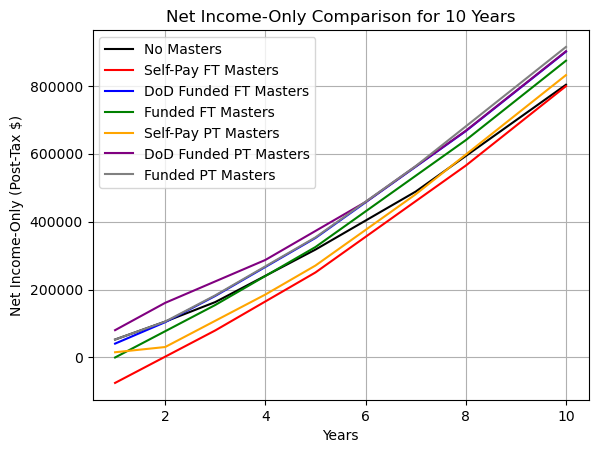

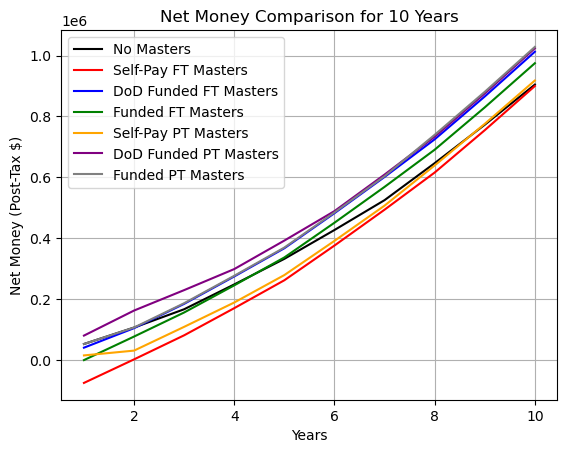

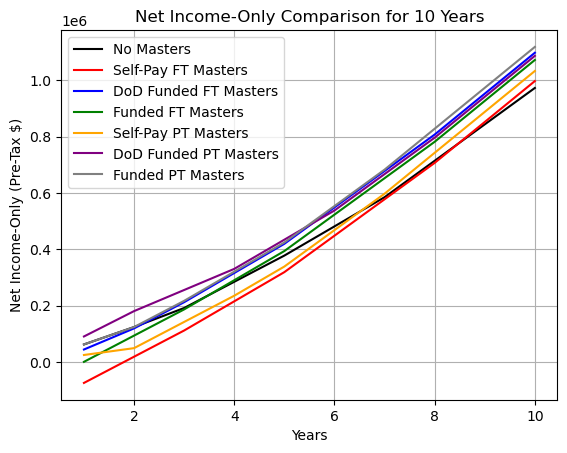

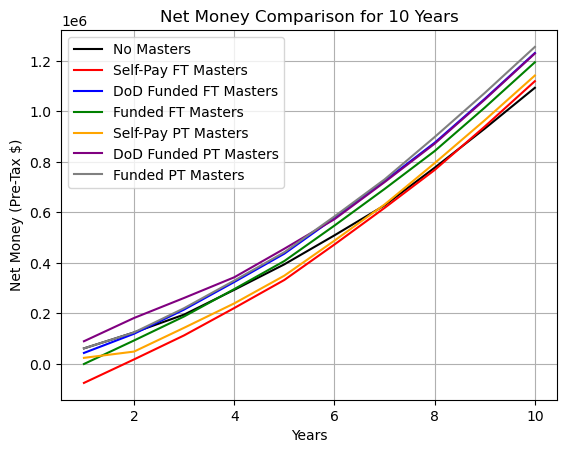

In [30]:
var = Graph()
var.toggle_all_on()
var.graph_all(1, 10)